## RandomForest

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('./data.csv')

data_x = data.iloc[:,:-1]
data_y = data.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 데이터 표준화
standardized_data_x = scaler.fit_transform(data_x)
data_s_x = pd.DataFrame(standardized_data_x, columns = data_x.columns)

X_train, X_test, y_train, y_test = train_test_split(data_s_x, data_y, test_size=0.2, random_state=0)

In [97]:
param_grid = {
    'n_estimators': [30,50,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10,20,30]
}

In [98]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100}
Best score: 0.9059602649006623


C:\Users\yy950\anaconda3\envs\py38\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yy950\anaconda3\envs\py38\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yy950\anaconda3\envs\py38\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\yy950\anaconda3\envs\py38\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:

In [99]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
rf = RandomForestClassifier(n_estimators=100,max_depth = 10,max_features = 'log2', random_state=0)
scores = cross_val_score(rf, X_train, y_train, cv=kf)

# 결과 출력
print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

Cross-validation scores: [0.89403974 0.91390728 0.91390728 0.8807947  0.87417219]
Average score: 0.895364238410596


In [100]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

Accuracy: 0.8994708994708994
Confusion Matrix:
 [[97  8]
 [11 73]]
F1 Score: 0.8978233034571064


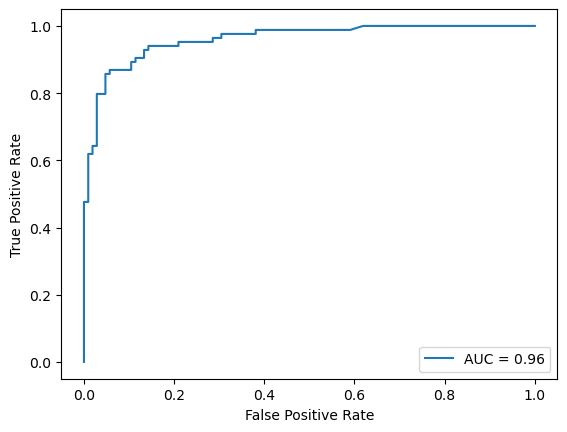

AUC: 0.9602607709750567


In [101]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score:", f1)

# 예측 확률 계산 (모델이 probability 출력을 지원해야 함)
y_probs = rf.predict_proba(X_test)[:, 1]  # 이진 분류의 경우

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# ROC 곡선 그리기
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.show()
print("AUC:", roc_auc)

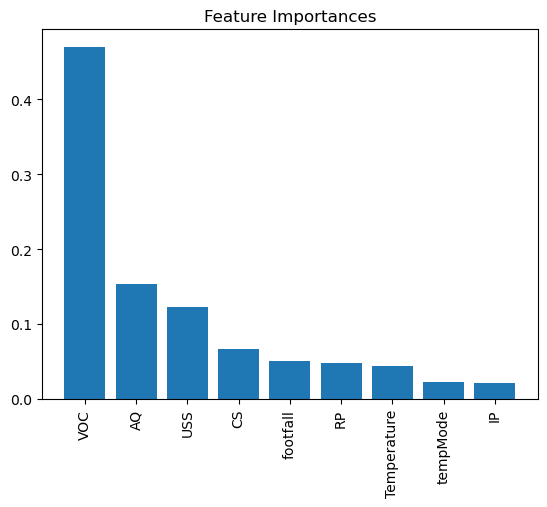

In [103]:
# 특성 중요도 얻기
importances = rf.feature_importances_

# 특성 이름
feature_names = data_x.columns

# 특성 중요도를 내림차순으로 정렬
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)

# 중요도가 높은 순으로 특성 이름 정렬
sorted_feature_names = [feature_names[i] for i in indices]
sorted_importances = [importances[i] for i in indices]

# 중요도 그래프 출력
plt.figure()
plt.title("Feature Importances")
plt.bar(range(len(importances)), sorted_importances, align='center')
plt.xticks(range(len(importances)), sorted_feature_names, rotation=90)
plt.show()